In [162]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [163]:
import numpy as np
import pandas as pd

In [164]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [165]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [166]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [167]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [168]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [169]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [170]:
# Create our session (link) from Python to the DB
session = Session(engine)
inspector = inspect(engine)

# Exploratory Climate Analysis

In [171]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
columns = inspector.get_columns('Measurement')
for column in columns:
    print(column["name"], column["type"])






id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [172]:
# Calculate the date 1 year ago from the last data point in the database

lastdate=engine.execute('select max(date(date)) from Measurement').fetchone()
lastdate

('2017-08-23',)

In [173]:
# Perform a query to retrieve the data and precipitation scores

myresult=engine.execute('SELECT date,prcp \
               FROM Measurement where DATETIME(date) < "2017-08-23" \
               AND DATETIME(date) > "2016-08-23" \
               ').fetchall()

print(len(myresult))
# Save the query results as a Pandas DataFrame 

myresult_df= pd.DataFrame(myresult,columns=['date','prcp'])

#and set the index to the date column
myresult_df.set_index('date', inplace=True)


myresult_df.head()

2226


,prcp
date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [174]:
# Sort the dataframe by date

myresult_df.dtypes
myresult_df.sort_values(by='date',ascending=True).head()

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


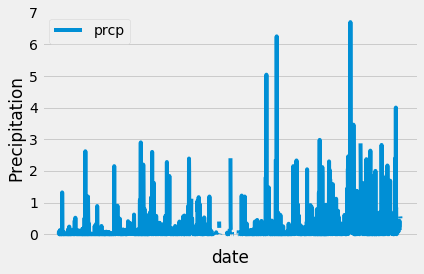

In [175]:
# Use Pandas Plotting with Matplotlib to plot the data

prcp_chart = myresult_df.plot(xticks=([]))

prcp_chart.set_xlabel("date")
prcp_chart.set_ylabel("Precipitation")


plt.show()



![precipitation](Images/precipitation.png)

In [176]:
# Use Pandas to calcualte the summary statistics for the precipitation data
myresult_df.describe()

,prcp
count,2017.000000
mean,0.177367
std,0.461568
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [177]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(Measurement).group_by(Measurement.station).count()
print(f'there are {stations} stations')

there are 9 stations


In [178]:
first_row = session.query(Measurement).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1213139e8>,
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08}

In [179]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_sta=session.query(Measurement.station, func.count(Measurement.tobs)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.tobs).desc()).all()
active_sta

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [180]:
print(f'the most active station is {active_sta[0]}')

the most active station is ('USC00519281', 2772)


In [181]:
#last temp recorded for station 'USC00519281'

last_temp_rec=session.query(Measurement.date).\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date.desc()).first()

print(f'last temperature record date for station USC00519281 is {last_temp_rec}')

last temperature record date for station USC00519281 is ('2017-08-18',)


In [182]:
#first temp record date in the last 12 months
query_date = dt.date(2017,8,18) - dt.timedelta(days=365)
print(f'first temperature record date for station USC00519281 in last 12 months is {query_date}')



first temperature record date for station USC00519281 in last 12 months is 2016-08-18


In [183]:
# temperature for the last 12 months for all stations:
temp_all=engine.execute('SELECT station,date,tobs \
               FROM Measurement where DATETIME(date) < "2017-08-23" \
               AND DATETIME(date) > "2016-08-23" \
               ').fetchall()



In [184]:
# temperature for the most active station in 12 months:

temp_actSta=engine.execute('SELECT station,date,tobs \
                FROM Measurement where station = "USC00519281" AND DATETIME(date) < "2017-08-18" \
                AND DATETIME(date) > "2016-08-18" \
                ').fetchall()


temp_actSta

[('USC00519281', '2016-08-18', 80.0),
 ('USC00519281', '2016-08-19', 79.0),
 ('USC00519281', '2016-08-20', 81.0),
 ('USC00519281', '2016-08-21', 79.0),
 ('USC00519281', '2016-08-22', 78.0),
 ('USC00519281', '2016-08-23', 77.0),
 ('USC00519281', '2016-08-24', 77.0),
 ('USC00519281', '2016-08-25', 80.0),
 ('USC00519281', '2016-08-26', 80.0),
 ('USC00519281', '2016-08-27', 75.0),
 ('USC00519281', '2016-08-28', 73.0),
 ('USC00519281', '2016-08-29', 78.0),
 ('USC00519281', '2016-08-30', 77.0),
 ('USC00519281', '2016-08-31', 78.0),
 ('USC00519281', '2016-09-01', 80.0),
 ('USC00519281', '2016-09-02', 80.0),
 ('USC00519281', '2016-09-03', 78.0),
 ('USC00519281', '2016-09-04', 78.0),
 ('USC00519281', '2016-09-05', 78.0),
 ('USC00519281', '2016-09-06', 73.0),
 ('USC00519281', '2016-09-07', 74.0),
 ('USC00519281', '2016-09-08', 80.0),
 ('USC00519281', '2016-09-09', 79.0),
 ('USC00519281', '2016-09-10', 77.0),
 ('USC00519281', '2016-09-11', 80.0),
 ('USC00519281', '2016-09-12', 76.0),
 ('USC005192

In [185]:
# print(len(temp))
temp_actSta_df= pd.DataFrame(temp_actSta, columns=['station','date', 'tobs'])

temp_actSta_df.set_index('station', inplace=True)

temp_actSta_df.head()

,date,tobs
station,,
USC00519281,2016-08-18,80.0
USC00519281,2016-08-19,79.0
USC00519281,2016-08-20,81.0
USC00519281,2016-08-21,79.0
USC00519281,2016-08-22,78.0


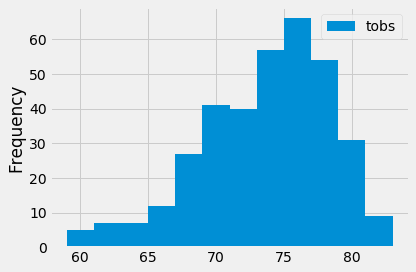

In [186]:
temp_actSta_df.plot.hist(bins=12)
plt.tight_layout()
plt.show()

In [187]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

cal_Temp= session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all()
print(cal_Temp)


[(54.0, 71.66378066378067, 85.0)]


![precipitation](Images/station-histogram.png)

In [188]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [189]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


my_trip=calc_temps('2017-08-01', '2017-08-15')
my_trip

[(70.0, 78.8688524590164, 84.0)]

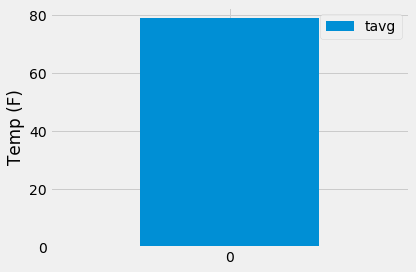

In [190]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

my_trip_df = pd.DataFrame(my_trip, columns=['tmin', 'tavg', 'tmax'])
ax = my_trip_df.plot.bar(y='tavg', rot=0)
plt.ylabel("Temp (F)")
plt.tight_layout()




In [19]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 0.31), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.25), ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.1), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.060000000000000005), ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.0), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [20]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [21]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [22]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


,tmin,tavg,tmax
date,,,
2018-01-01,62.0,69.153846,77.0
2018-01-02,60.0,69.396226,77.0
2018-01-03,62.0,68.909091,77.0
2018-01-04,58.0,70.000000,76.0
2018-01-05,56.0,67.964286,76.0


<IPython.core.display.Javascript object>


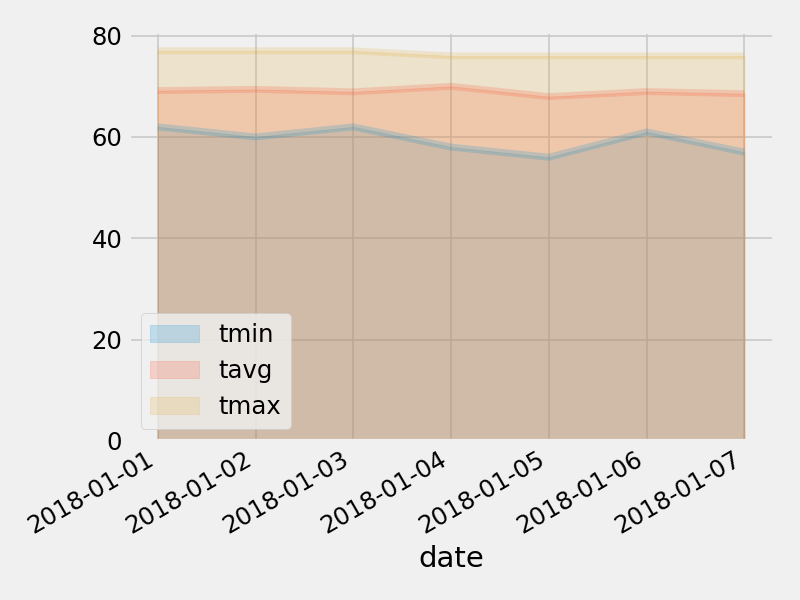

In [23]:
# Plot the daily normals as an area plot with `stacked=False`
